In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
import xgboost as xgb
import shap
from shap import plots
shap.initjs()

d:\DevTools\Runtimes\anaconda3\envs\figplots\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data = pd.read_csv("../data_sets/scaled_annual_data_JFE.csv")
y = data.iloc[:,2]
X = data.iloc[:,3:]
Dates = data.iloc[:,1]

In [ ]:
# 训练 XGBoost 模型
model = xgb.XGBRegressor(objective="reg:squarederror",
                         max_depth=3,
                         eta = 0.3,
                         colsample_bytree = 0.8,
                         subsample = 1,
                         n_estimators=150
                        ) 
model.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# 创建解释器
explainer = shap.TreeExplainer(model)

#### Interaction importance

In [ ]:
# 获取 SHAP 交互值
shap_interaction = explainer.shap_interaction_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
# 计算每个特征对的平均绝对SHAP值
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

# 对非主对角线元素乘以2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

In [8]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of SHAP interaction matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_interactions(df):
    au_corr = df.unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

interaction_bar_plot = get_interactions(df)

interaction_bar_plot = interaction_bar_plot[0:29].sort_values(ascending=True)

### XGBoost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
import xgboost as xgb
import shap
from shap import plots
shap.initjs()

data = pd.read_csv("../data_sets/scaled_annual_data_JFE.csv")
y = data.iloc[:,2]
X = data.iloc[:,3:]
Dates = data.iloc[:,1]

model = xgb.XGBRegressor(objective="reg:squarederror",
                         max_depth=3,
                         eta = 0.3,
                         colsample_bytree = 0.8,
                         subsample = 1,
                         n_estimators=150
                        ) 
model.fit(X, y)

explainer = shap.TreeExplainer(model)

shap_interaction = explainer.shap_interaction_values(X)

# 计算每个特征对的平均绝对SHAP值
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

# 对非主对角线元素乘以2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of SHAP interaction matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_interactions(df):
    au_corr = df.unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

interaction_bar_plot = get_interactions(df)

interaction_bar_plot = interaction_bar_plot[0:29].sort_values(ascending=True)

fig, ax = plt.subplots(figsize =(17,12))
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in interaction_bar_plot.values]
interaction_bar_plot.plot.barh(color="blue",width = 0.9)
ax.set_facecolor('white')
sns.despine(bottom=True,left=True)
plt.savefig("interaction_importance_SHAP_GB.pdf", format="pdf", bbox_inches="tight")

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 52131, number of used features: 17
[LightGBM] [Info] Start training from score -0.016464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

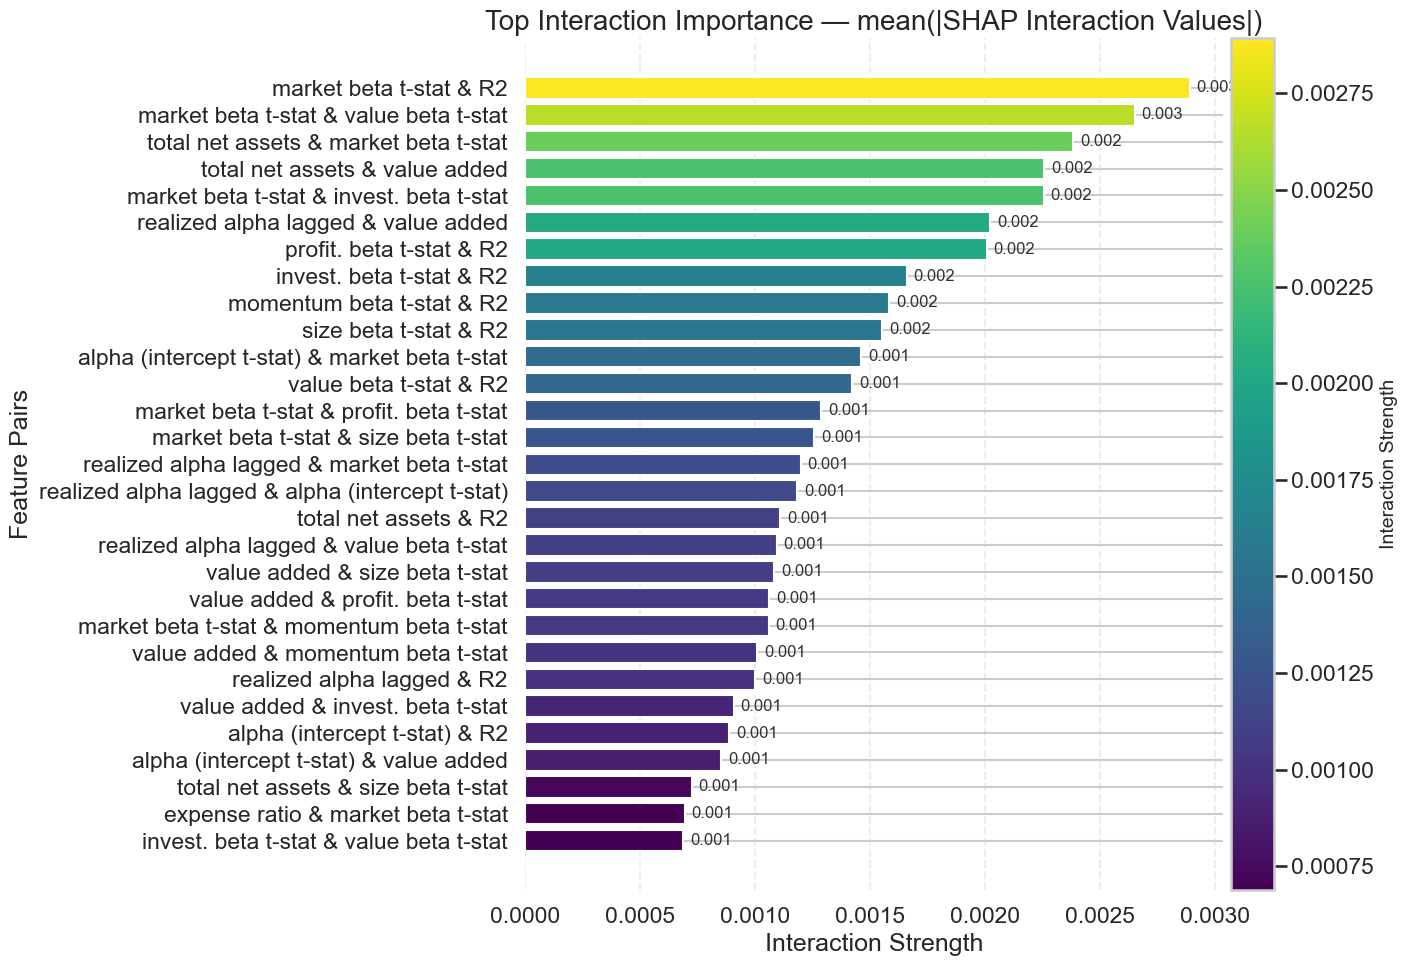

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
import lightgbm as lgb
import shap
from shap import plots
shap.initjs()

data = pd.read_csv("../data_sets/scaled_annual_data_JFE.csv")
y = data.iloc[:,2]
X = data.iloc[:,3:]
Dates = data.iloc[:,1]

model = lgb.LGBMRegressor(
    objective='regression',
    max_depth=3,
    learning_rate=0.3,
    colsample_bytree=0.8,
    subsample=1.0,
    n_estimators=150,
    random_state=42
) 
model.fit(X, y)

explainer = shap.TreeExplainer(model)

shap_interaction = explainer.shap_interaction_values(X)

mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of SHAP interaction matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_interactions(df):
    au_corr = df.unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

sns.set_theme(style="whitegrid", context="talk")

interaction_bar_plot = interaction_bar_plot[0:29].sort_values(ascending=False)
feature_pairs = [' & '.join(pair) for pair in interaction_bar_plot.index]
values = interaction_bar_plot.values

cmap = plt.cm.viridis
norm = plt.Normalize(values.min(), values.max())
colors = cmap(norm(values))

fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.barh(feature_pairs, values, color=colors)
ax.invert_yaxis()

ax.set_xlabel('Interaction Strength', fontsize=18)
ax.set_ylabel('Feature Pairs', fontsize=18)
ax.set_title('Top Interaction Importance — mean(|SHAP Interaction Values|)', fontsize=20)

ax.grid(axis='x', linestyle='--', alpha=0.35)
sns.despine(left=True, bottom=True)

max_val = values.max()
for i, (pair, val) in enumerate(zip(feature_pairs, values)):
    ax.text(val + max_val * 0.01, i, f'{val:.3f}', 
            va='center', fontsize=12, color='#333')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Interaction Strength', fontsize=14)

plt.tight_layout()
plt.savefig("interaction_importance_SHAP_LGB_styled.pdf", format="pdf", bbox_inches="tight")